# Exploratory Data Analysis, Preprocessing, and Visualization of Boston Public Service Payroll Data 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
    # Load the CSV file
    df = pd.read_csv("finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv")
    new_df=df.copy()

In [3]:
    # Display the first 5 rows of the DataFrame
    print(df.head())

                NAME           DEPARTMENT_NAME                    TITLE  \
0     Gavin,Donna M.  Boston Police Department  Police Lieutenant (Det)   
1  Cassellius,Brenda            Superintendent           Superintendent   
2       Dempsey,John    Boston Fire Department       Commissioner (BFD)   
3   Demesmin,Stanley  Boston Police Department  Police Lieutenant (Det)   
4       Smith,Sean P  Boston Police Department        Police Lieutenant   

      REGULAR RETRO         OTHER    OVERTIME INJURED     DETAIL  \
0   53,226.90   NaN  1,045,845.44      463.52     NaN        NaN   
1  179,109.61   NaN    417,839.83         NaN     NaN        NaN   
2  133,653.78   NaN    312,752.53         NaN     NaN        NaN   
3  145,775.26   NaN     13,932.92  196,515.25     NaN  11,880.00   
4  142,535.62   NaN     18,827.45  142,692.38     NaN  46,365.00   

  QUINN_EDUCATION   TOTAL_GROSS POSTAL  
0       12,812.39  1,112,348.25   2186  
1             NaN    596,949.44  55419  
2             NaN

In [4]:
    # Set the display width option to 0 to show all columns without truncation
    pd.options.display.width = 0
    # Display basic statistics of the DataFrame
    print(df.describe())

                 NAME           DEPARTMENT_NAME    TITLE     REGULAR   RETRO  \
count           23204                     23204    23204       22604    3092   
unique          23133                       232     1507       19422    2917   
top     Kelly,Michael  Boston Police Department  Teacher  104,644.14  728.97   
freq                4                      3040     5304          49      25   

           OTHER OVERTIME    INJURED DETAIL QUINN_EDUCATION TOTAL_GROSS POSTAL  
count      15826     6812       1221   2116            1369       23204  23204  
unique      6294     6740       1150   1246             818       22428    580  
top     1,250.00   283.12  94,596.32    368       26,161.00    1,500.00   2124  
freq        1149        4          9     77              31          31   1867  


In [5]:
    # Print the count of missing values for each column
    print(df.isnull().sum(), '\n')

NAME                   0
DEPARTMENT_NAME        0
TITLE                  0
REGULAR              600
RETRO              20112
OTHER               7378
OVERTIME           16392
INJURED            21983
DETAIL             21088
QUINN_EDUCATION    21835
TOTAL_GROSS            0
POSTAL                 0
dtype: int64 



In [6]:
    # Print the top 10 department names with the highest frequency
    print(df['DEPARTMENT_NAME'].value_counts().head(10), '\n')

Boston Police Department          3040
Boston Fire Department            1769
BPS Special Education              873
BPS Substitute Teachers/Nurs       711
BPS Facility Management            592
Food & Nutrition Svc               523
BPS Transportation                 514
Boston Public Library              501
Public Works Department            392
Boston Cntr - Youth & Families     384
Name: DEPARTMENT_NAME, dtype: int64 



In [7]:
    # Print the top 10 job titles with the highest frequency
    print(df['TITLE'].value_counts().head(10), '\n')

Teacher                          5304
Paraprofessional                 1561
Police Officer                   1289
Fire Fighter                      867
Part-Time Cafeteria Attendant     435
Lunch Hour Monitors               340
Police Detective                  291
Substitute Teacher                234
Substitute Teacher HE             227
Social Worker/Coordinator         212
Name: TITLE, dtype: int64 



In [8]:
    # Print the top 20 departments with the most 'Teacher' job titles
    print(df[df['TITLE'] == 'Teacher'].groupby('DEPARTMENT_NAME').size().nlargest(20), '\n')

DEPARTMENT_NAME
BPS Boston Latin                 143
BPS Madison Park High            135
Henderson Elementary             126
BPS O'Bryant School              123
BPS East Boston High             108
Curley K-8                       108
BPS Latin Academy                104
BPS Charlestown High              95
BPS Orchard Gardens K-8 Pilot     86
Tech Boston Academy               86
BPS Condon Elementary             78
BPS Mckay Elementary              78
UP Academy Dorchester             77
BPS Murphy Elementary             76
BPS Quincy Elementary             75
BPS Boston Comm Leadership Ac     71
Edison K-8                        69
Umana Middle                      67
BPS English High                  66
BPS Blackstone Elementary         64
dtype: int64 



In [9]:
    # Display the top 10 departments by frequency
    top_10_departments = new_df['DEPARTMENT_NAME'].value_counts().head(10)
    print("\nTop 10 Departments by Frequency:")
    print(top_10_departments)


Top 10 Departments by Frequency:
Boston Police Department          3040
Boston Fire Department            1769
BPS Special Education              873
BPS Substitute Teachers/Nurs       711
BPS Facility Management            592
Food & Nutrition Svc               523
BPS Transportation                 514
Boston Public Library              501
Public Works Department            392
Boston Cntr - Youth & Families     384
Name: DEPARTMENT_NAME, dtype: int64


In [10]:
    # List of columns to convert to integers after removing non-numeric characters and commas
    columns_to_convert = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION',
                                  'TOTAL_GROSS']

    # Create a new DataFrame 'new_df' as a copy of the original DataFrame 'df'
    new_df = df.copy()

    # Loop through the specified columns and clean/convert them
    for column in columns_to_convert:
        new_df[column] = new_df[column].str.replace(',', '', regex=True).astype(float).fillna(0).astype(int)

In [11]:
    # Print information about the 'new_df' DataFrame
    print(new_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23204 entries, 0 to 23203
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             23204 non-null  object
 1   DEPARTMENT_NAME  23204 non-null  object
 2   TITLE            23204 non-null  object
 3   REGULAR          23204 non-null  int32 
 4   RETRO            23204 non-null  int32 
 5   OTHER            23204 non-null  int32 
 6   OVERTIME         23204 non-null  int32 
 7   INJURED          23204 non-null  int32 
 8   DETAIL           23204 non-null  int32 
 9   QUINN_EDUCATION  23204 non-null  int32 
 10  TOTAL_GROSS      23204 non-null  int32 
 11  POSTAL           23204 non-null  object
dtypes: int32(8), object(4)
memory usage: 1.4+ MB
None 



In [12]:
    # Display basic statistics of the 'new_df' DataFrame
    print(new_df.describe(), '\n')

             REGULAR         RETRO         OTHER       OVERTIME  \
count   23204.000000  23204.000000  2.320400e+04   23204.000000   
mean    68985.077530    376.228926  3.210182e+03    6096.129202   
std     43790.123105   1089.607307  1.134299e+04   15686.197527   
min    -17515.000000      0.000000 -4.800000e+01   -2000.000000   
25%     30767.000000      0.000000  0.000000e+00       0.000000   
50%     69134.000000      0.000000  9.000000e+02       0.000000   
75%    106890.000000      0.000000  2.848000e+03    1077.750000   
max    290703.000000  10087.000000  1.045845e+06  210126.000000   

             INJURED         DETAIL  QUINN_EDUCATION   TOTAL_GROSS  
count   23204.000000   23204.000000     23204.000000  2.320400e+04  
mean     1929.214489    1394.119591      1210.401181  8.320177e+04  
std     12558.620423    7412.519991      5295.721381  5.734259e+04  
min     -2031.000000       0.000000         0.000000  1.400000e+01  
25%         0.000000       0.000000         0.00000

In [13]:
    # List of columns to check for negative values
    columns_to_check = ['REGULAR', 'OTHER', 'OVERTIME', 'INJURED']

    # Print the count of rows where the specified columns have negative values
    for column in columns_to_check:
        print(new_df[new_df[column] < 0].count(), '\n')

NAME               5
DEPARTMENT_NAME    5
TITLE              5
REGULAR            5
RETRO              5
OTHER              5
OVERTIME           5
INJURED            5
DETAIL             5
QUINN_EDUCATION    5
TOTAL_GROSS        5
POSTAL             5
dtype: int64 

NAME               1
DEPARTMENT_NAME    1
TITLE              1
REGULAR            1
RETRO              1
OTHER              1
OVERTIME           1
INJURED            1
DETAIL             1
QUINN_EDUCATION    1
TOTAL_GROSS        1
POSTAL             1
dtype: int64 

NAME               5
DEPARTMENT_NAME    5
TITLE              5
REGULAR            5
RETRO              5
OTHER              5
OVERTIME           5
INJURED            5
DETAIL             5
QUINN_EDUCATION    5
TOTAL_GROSS        5
POSTAL             5
dtype: int64 

NAME               1
DEPARTMENT_NAME    1
TITLE              1
REGULAR            1
RETRO              1
OTHER              1
OVERTIME           1
INJURED            1
DETAIL             1
QUINN_EDUC

In [14]:
    # Remove rows where specified columns have negative values
    for column in columns_to_check:
        new_df = new_df[new_df[column] >= 0]

    # Print information about the 'new_df' DataFrame after removing negative values
    print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23192 entries, 0 to 23203
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             23192 non-null  object
 1   DEPARTMENT_NAME  23192 non-null  object
 2   TITLE            23192 non-null  object
 3   REGULAR          23192 non-null  int32 
 4   RETRO            23192 non-null  int32 
 5   OTHER            23192 non-null  int32 
 6   OVERTIME         23192 non-null  int32 
 7   INJURED          23192 non-null  int32 
 8   DETAIL           23192 non-null  int32 
 9   QUINN_EDUCATION  23192 non-null  int32 
 10  TOTAL_GROSS      23192 non-null  int32 
 11  POSTAL           23192 non-null  object
dtypes: int32(8), object(4)
memory usage: 1.6+ MB
None


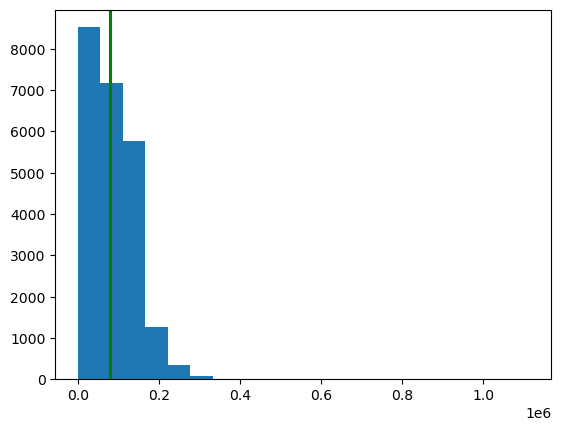

In [15]:
    # Create a histogram of the 'TOTAL_GROSS' column
    plt.hist(new_df.TOTAL_GROSS, bins=20)
    mn = new_df.TOTAL_GROSS.mean()
    md = new_df.TOTAL_GROSS.median()
    plt.axvline(x=mn, color="red")
    plt.axvline(x=md, color="green")
    plt.show()

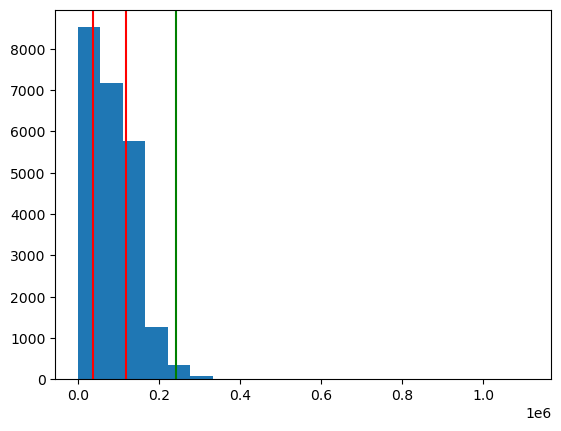

In [16]:
    new_df['TOTAL_GROSS'].quantile(q=[0, 0.25, 0.5, 0.75, 1])
    Q1=new_df['TOTAL_GROSS'].quantile(0.25)
    Q3=new_df['TOTAL_GROSS'].quantile(0.75)
    IQR=Q3-Q1
    LowerThreshold = Q1 - 1.5 * IQR
    UpperThreshold = Q3 + 1.5 * IQR
    plt.hist(new_df.TOTAL_GROSS, bins=20)
    plt.axvline(x=Q1, color="red")
    plt.axvline(x=Q3, color="red")
    plt.axvline(x=UpperThreshold, color="green")
    plt.show()

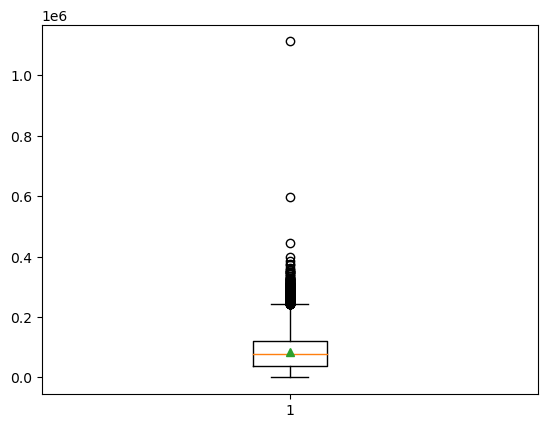

In [17]:
    plt.boxplot(new_df.TOTAL_GROSS,showmeans=True)
    plt.show()

Boston Police Department          3032
Boston Fire Department            1769
BPS Special Education              873
BPS Substitute Teachers/Nurs       711
BPS Facility Management            592
Food & Nutrition Svc               522
BPS Transportation                 514
Boston Public Library              501
Public Works Department            391
Boston Cntr - Youth & Families     384
Name: DEPARTMENT_NAME, dtype: int64


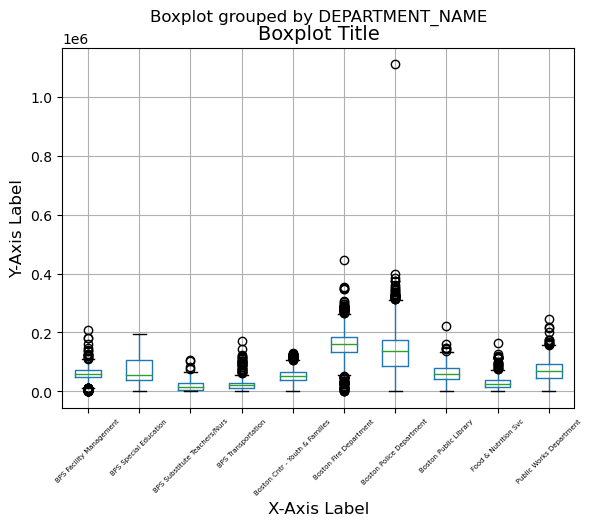

In [18]:
    top_10_departments = new_df['DEPARTMENT_NAME'].value_counts().nlargest(10)
    print(top_10_departments)
    new_df = new_df[new_df['DEPARTMENT_NAME'].isin(top_10_departments.index)]
    # Create the boxplot
   
    new_df.boxplot(column=['TOTAL_GROSS'], by='DEPARTMENT_NAME')
   
    # Rotate x-axis labels by 45 degrees
    plt.xticks(rotation=45)
    
    # Set the font size for various plot elements
    plt.xlabel('X-Axis Label', fontsize=12)  # Adjust the fontsize as needed
    plt.ylabel('Y-Axis Label', fontsize=12)  # Adjust the fontsize as needed
    plt.title('Boxplot Title', fontsize=14)   # Adjust the fontsize as needed
   
    # Set the font size for x-axis and y-axis tick labels
    plt.xticks(fontsize=5)  # Adjust the fontsize as needed
    plt.yticks(fontsize=10)  # Adjust the fontsize as needed
    plt.show()

In [19]:
    # Display the top 10 job titles by frequency
    top_10_job_titles = df['TITLE'].value_counts().head(10)

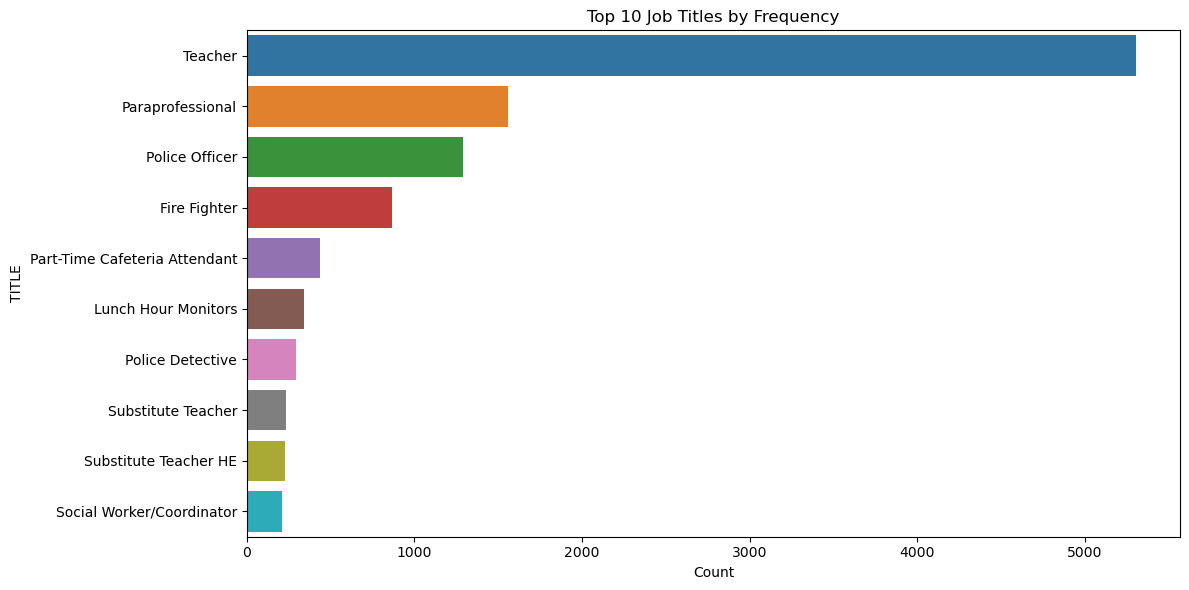

In [20]:
    # Create count plots for the top 10 departments and job titles
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_job_titles.values, y=top_10_job_titles.index)
    plt.xlabel('Count')
    plt.ylabel('TITLE')
    plt.title('Top 10 Job Titles by Frequency')
    plt.tight_layout()
    plt.show()

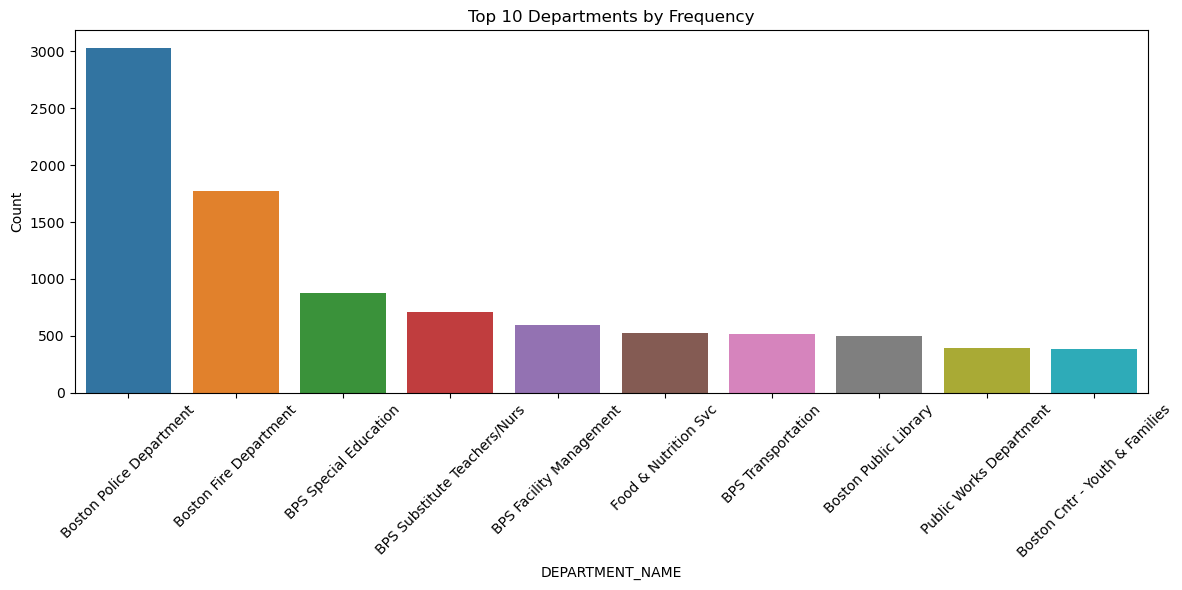

In [21]:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_departments.index, y=top_10_departments.values)
    plt.xticks(rotation=45)
    plt.xlabel('DEPARTMENT_NAME')
    plt.ylabel('Count')
    plt.title('Top 10 Departments by Frequency')
    plt.tight_layout()
    plt.show()

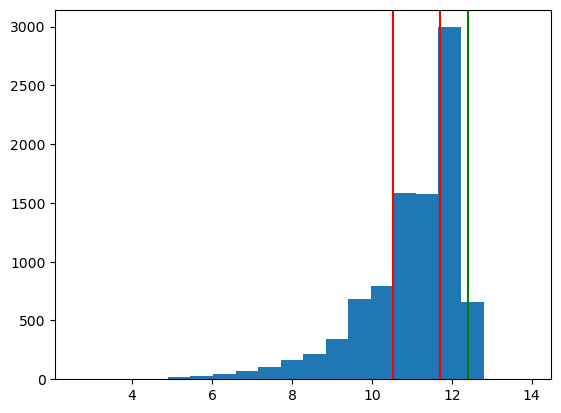

In [22]:
    # Apply log transformation to 'TOTAL_GROSS'
    new_df['TOTAL_GROSS_log'] = np.log(new_df['TOTAL_GROSS'])

    # Plot the histogram
    plt.hist(new_df['TOTAL_GROSS_log'], bins=20)
    plt.axvline(x=np.log(Q1), color="red")  # Log transformation of Q1
    plt.axvline(x=np.log(Q3), color="red")  # Log transformation of Q3
    plt.axvline(x=np.log(UpperThreshold), color="green")  # Log transformation of UpperThreshold
    plt.show()

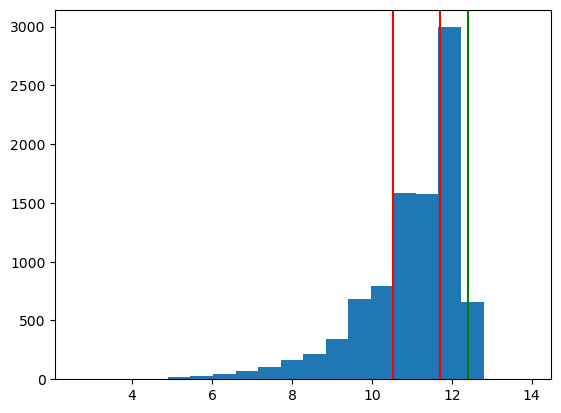

In [23]:
    # Apply log transformation to 'TOTAL_GROSS'
    new_df['TOTAL_GROSS_log'] = np.log(new_df['TOTAL_GROSS'])

    # Plot the histogram
    plt.hist(new_df['TOTAL_GROSS_log'], bins=20)
    plt.axvline(x=np.log(Q1), color="red")  # Log transformation of Q1
    plt.axvline(x=np.log(Q3), color="red")  # Log transformation of Q3
    plt.axvline(x=np.log(UpperThreshold), color="green")  # Log transformation of UpperThreshold
    plt.show()

In [24]:
    # Create a new DataFrame with Z-scores
    zscore_df = new_df.copy()  # Create a copy of the original DataFrame to avoid modifying it
    zscore_df[columns_to_convert] = zscore_df[columns_to_convert].apply(stats.zscore)

    # Print the first 10 rows of the new DataFrame
    print(zscore_df.head(10))

                  NAME           DEPARTMENT_NAME                      TITLE  \
0       Gavin,Donna M.  Boston Police Department    Police Lieutenant (Det)   
2         Dempsey,John    Boston Fire Department         Commissioner (BFD)   
3     Demesmin,Stanley  Boston Police Department    Police Lieutenant (Det)   
4         Smith,Sean P  Boston Police Department          Police Lieutenant   
5   McCormick,Kelley J  Boston Police Department             Police Captain   
6       Long,Gregory P  Boston Police Department              Supn-In Chief   
7     Danilecki,John H  Boston Police Department             Police Captain   
8         Webb,Keith A  Boston Police Department      Police Sergeant (Det)   
9     McMahon,Joseph G    Boston Fire Department  Chief of Support Services   
10  Doherty,Michael J.    Boston Fire Department             Dep Fire Chief   

     REGULAR     RETRO      OTHER  OVERTIME   INJURED    DETAIL  \
0  -0.307214 -0.290144  67.486120 -0.619957 -0.223872 -0.302543

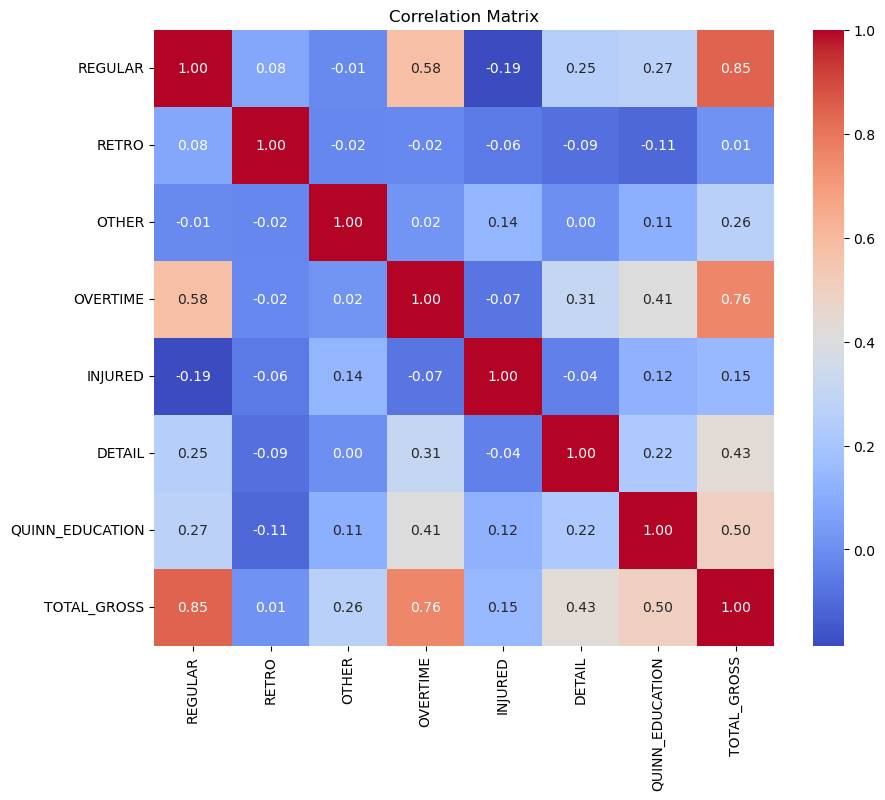

In [25]:
    # Calculate the correlation matrix for selected columns
    columns_of_interest = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION',
                           'TOTAL_GROSS']
    correlation_matrix = new_df[columns_of_interest].corr()
    # Plot the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()